In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

## Preprocessing

In [2]:
# to record the time of execution
start = time.time()

#### Description of the dataset

https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

Two datasets are included, related to red and white wine samples, from the north of Portugal.

Both datasets consist of the physicochemical input variables (11 attributes):
* fixed acidity	
* volatile acidity
* citric acid	
* residual sugar	
* chlorides	
* free sulfur dioxide	
* total sulfur dioxide	
* density	
* pH	
* sulphates	
* alcohol

that define the sensory output variable - *quality*.


In [3]:
wine_red_df = pd.read_csv('winequality-red.csv', sep=';')
wine_white_df = pd.read_csv('winequality-white.csv', sep=';')

In [4]:
wine_red_df.shape

(1599, 12)

In [5]:
wine_white_df.shape

(4898, 12)

In [6]:
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# Add columns in dfs to differentiate the wine type in one merged df
wine_red_df['type'] = 'red wine'
wine_white_df['type'] = 'white wine'

Here we merge two datasets in one *wine_df* - pandas data frame. As a result it contains 6497 rows and 13 columns 

In [9]:
# Merge two dfs in one wine_df
frames = [wine_red_df, wine_white_df]
wine_df = pd.concat(frames)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white wine
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white wine
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white wine
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white wine


In the resulting dataset, we would like to make the wine type (red / white) as feature for prediction. 

This is why we add a new column with a binary value that indicates whether the wine is red or not.

In [10]:
# Make wine type one of the feature for classification
wine_df['IsRed'] = (wine_df['type'] == 'red wine').astype(int)

In [11]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
IsRed                   0
dtype: int64

The resultant df has no missing values.

#### Exploratory Data Analysis

Here is a correlation matrix to show the correlation between variables, and especially the correlation of feature variables with respect to the quality variable. The brighter the color of the cells, the stronger the relationship between the two variables.
At this point, it can be seen that the value of alcohol correlates with quality.

Text(0.5, -0.1, 'Correlation Matrix')

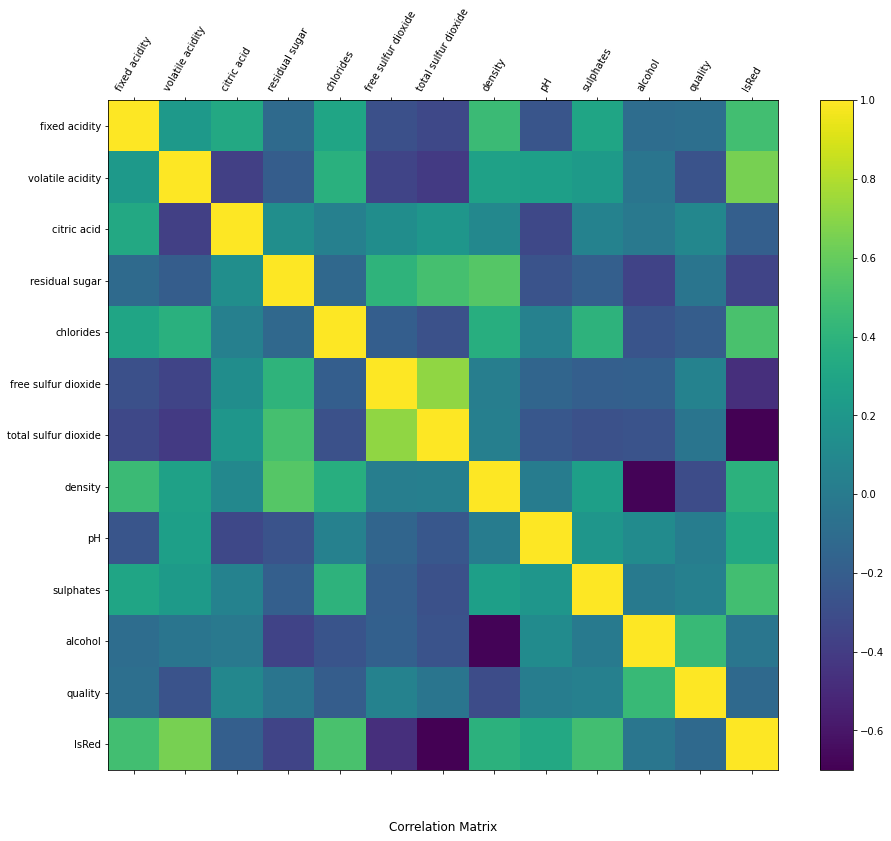

In [12]:
f = plt.figure(figsize=(15, 12))
plt.matshow(wine_df.corr(), fignum=f.number)
plt.xticks(range(wine_df.select_dtypes(['number']).shape[1]), wine_df.select_dtypes(['number']).columns, rotation=60)
plt.yticks(range(wine_df.select_dtypes(['number']).shape[1]), wine_df.select_dtypes(['number']).columns)
cb = plt.colorbar()
plt.title('Correlation Matrix',  y=-0.1)

The sensory output variable 'quality' is presented by values between 0 and 10 (indeed 3 and 9). Here is the 'quality' distribution. 

In [13]:
# wine_df.shape
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

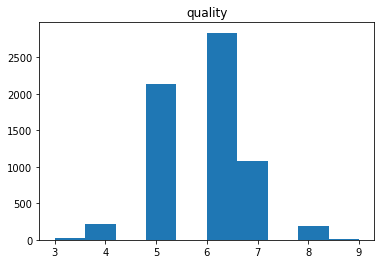

In [14]:
hist = wine_df.hist(column='quality', grid=False)

It can be concluded that wine that has quality parameter more than 6 can be considered as "high-quality" wine, while quality parameter 5 and less indicates that wine is "low-quality".

For the classification task, we label each record with the appropriate binary quality representation, thereby converting the target to binary output.

In [15]:
# Add a new column, which is assigned 1 if quality  >= 6, otherwise 0
wine_df['IsHighQuality'] = [1 if x >= 6 else 0 for x in wine_df['quality']]
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,IsRed,IsHighQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red wine,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red wine,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red wine,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red wine,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red wine,1,0


In [16]:
# the distribution of records in each category (1-4113, 0-2384)
wine_df['IsHighQuality'].value_counts()

1    4113
0    2384
Name: IsHighQuality, dtype: int64

## Model Building

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

/home/daryasy/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


For the classification process, we divide the data frame into:
* X - features np array, and 
* Y - target variable np array. 

In the X array, we leave only the columns that will participate in the prediction process, i.e. remove target and non-numeric variables.

Then we split the data into a training and test set.

In [18]:
# the feature np array X and target variable np array y
X = wine_df.drop(['IsHighQuality', 'quality', 'type'], axis=1).values
y = wine_df['IsHighQuality'].values

# test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We compare 4 different machine learning models - K-nearest neighbors, logistic regression, decision trees, random forests.

"The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these." (Scikit learn, Nearest Neighbors)

In [19]:
knn = KNeighborsClassifier()

"Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function." (Scikit learn, Logistic regression)

In [20]:
# Here we specify the maximum number of iterations to prevent "TOTAL NO. of ITERATIONS REACHED LIMIT" error"
logreg = LogisticRegression(max_iter=10000)

"Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features" (Scikit learn, Decision Trees) 

In [21]:
# random_state=1 to obtain a deterministic behaviour during fitting
tree = DecisionTreeClassifier(random_state=1)

"The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. In random forests each tree in the ensemble is built from a sample drawn with replacement from the training set." (Scikit learn, Ensemble methods)

In [22]:
randforest = RandomForestClassifier(random_state=1)

## Metaparameter Tuning

In [23]:
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

### KNN

The most important hyperparameter for K-nearest neighbors classifier is the number of neighbors (n_neighbors). We perform the grid search cross-validation (5 folds), with the list of values from 1 to 10, to determine the most optimal value of *k* - number of neighbors

In [24]:
param_grid = {'n_neighbors':np.arange(1, 10)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [25]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

The best value of k parameter is 1 neighbor, that provides the best score of 72% on cross-validation on the training set

In [26]:
knn_cv.best_params_

{'n_neighbors': 1}

In [27]:
knn_cv.best_score_

0.7204190419782335

Here we make a prediction on the test set using knn classifier with 1 neighbor.
First 10 prediction results: [1, 1, 0, 0, 1, 1, 0, 1, 0, 0]

In [28]:
y_predict_knn = knn_cv.best_estimator_.predict(X_test)
y_predict_knn[:10]

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

### Logistic Regression

Logistic regression does not really have any critical hyperparameters to tune. However, we can tune, for example, C parameter as it is a regularization parameter (inverse of regularization strength, smaller values specify stronger regularization). 

*np.logspace* returns numbers spaced evenly on a log scale, np.logspace(-4, 4, 20) takes to long to fit, that is why it is replaced with a list [100, 10, 1.0, 0.1]

In [29]:
param_grid = {'C': [100, 10, 1.0, 0.1]} 
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [30]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [100, 10, 1.0, 0.1]})

The best value of C parameter is  10, that provides the best score of 74% on cross-validation on the training set

In [31]:
logreg_cv.best_params_

{'C': 10}

In [32]:
logreg_cv.best_score_

0.7442737099281854

Here we make a prediction on the test set using logreg classifier with C parameter 4.2. First 10 prediction results: [1, 1, 0, 0, 1, 1, 0, 1, 0, 0]

In [33]:
y_predict_logreg = logreg_cv.predict(X_test)
y_predict_knn[:10]

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

### Decision Tree

For the Decision Tree classifier, the most important parameters are:
* the maximum depth of the tree - *max_depth*, default *None*,
* the number of random features to sample at each split point - *max_features*,
* the minimum number of samples required to split an internal node - *min_samples_leaf*,
* the function to measure the quality of a split - *criterion*, “gini” for the Gini impurity, “entropy” for the information gain.

In [34]:
param_grid = {"max_depth": [3, None],
              "max_features": ['sqrt', 'log2'],
              "min_samples_leaf": np.arange(1, 13),
              "criterion": ["gini", "entropy"]}
tree_cv = GridSearchCV(tree, param_grid, cv=5)

In [35]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])})

The best value of criterion parameter is 'entropy', max_depth is None, max_features is sqrt and min_samples_leaf is 1, which provide the best score of 76% on cross-validation on the training set

In [36]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1}

In [37]:
tree_cv.best_score_

0.7600521951580662

Here we make a prediction on the test set using decision tree classifier with aforementioned parameters. First 10 prediction results: [0, 1, 0, 1, 1, 0, 0, 0, 1, 1]

In [38]:
y_predict_tree = tree_cv.predict(X_test)
y_predict_tree[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

### Random Forest

For the Random Forest model, the most important parameters are:
* the number of random features to sample at each split point - *max_features*, default *sqrt(n_features)*,
* the number of trees - *n_estimators*, default 100, good values might be a log scale from 10 to 1,000.

In [39]:
param_grid = {"n_estimators": [10, 100, 1000],
              "max_features": ['sqrt', 'log2']}
randforest_cv = GridSearchCV(randforest, param_grid, cv=5)

In [40]:
randforest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]})

The best value of max_features parameter is 'sqrt' and n_estimators parameter - 1000, which provide the best score of 81% on cross-validation on the training set

In [41]:
randforest_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

In [42]:
randforest_cv.best_score_

0.8183528910935071

Here we make a prediction on the test set using random forest classifier with 'max_features': 'sqrt', 'n_estimators': 1000 parameters. First 10 prediction results: [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [43]:
y_predict_forest = randforest_cv.predict(X_test)
y_predict_forest[:10] 

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

## Model Evaluation

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

### KNN

KNN accuracy on the testing set is 75%

In [45]:
knn_cv.score(X_test, y_test)

0.7553846153846154

The confusion matrix shows the number of prediction that are:
* True Positive(high quality actual and predicted) is 672
* True Negative(low quality actual and predicted) is 310
* False Positive(low quality actual and high quality predicted) is 167
* False Negative(high quality actual and low quality predicted) is 151

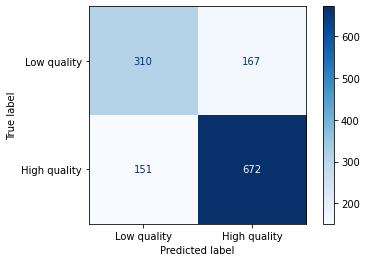

In [46]:
plot_confusion_matrix(knn_cv, X_test, y_test, display_labels=["Low quality", "High quality"], cmap=plt.cm.Blues)  

Based on the confusion matrix the next metrix (such as precision and recall) in the classification report are calculated:

In [47]:
report = classification_report(y_test, y_predict_knn, output_dict=True)
classification_report_knn = pd.DataFrame(report).transpose()
classification_report_knn

,precision,recall,f1-score,support
0,0.672451,0.649895,0.660981,477.000000
1,0.800954,0.816525,0.808664,823.000000
accuracy,0.755385,0.755385,0.755385,0.755385
macro avg,0.736702,0.733210,0.734823,1300.000000
weighted avg,0.753803,0.755385,0.754476,1300.000000


Below the ROC curve (receiver operating characteristic curve) shows the performance of a classification model at all classification thresholds with True Positive False Positive Rates parameters.

In [48]:
y_pred_prob_knn = knn_cv.predict_proba(X_test)[:,1]  # only select the probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

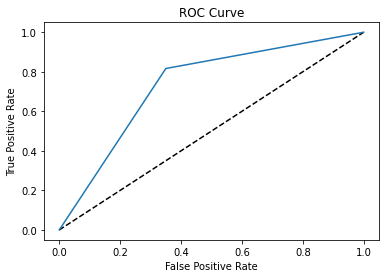

In [49]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The AUC (Area Under the Curve) measures the ability of a classifier to distinguish between classes, used as a summary of the ROC curve. 

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [50]:
#Compute AUC score
roc_auc_score(y_test, y_pred_prob_knn)

0.7332100435335265

### Logistic Regression

Logistic Regression accuracy on the testing set is 74%

In [51]:
logreg_cv.score(X_test, y_test)

0.7461538461538462

Comparing to the KNN, logreg more often predicts actual low quality wines as high quality 

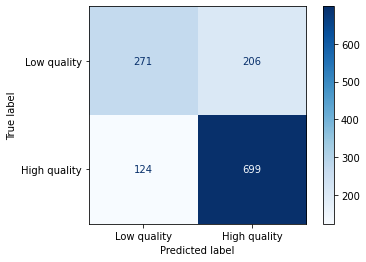

In [52]:
plot_confusion_matrix(logreg_cv, X_test, y_test, display_labels=["Low quality", "High quality"], cmap=plt.cm.Blues)  

In [53]:
report = classification_report(y_test, y_predict_logreg, output_dict=True)
classification_report_logreg = pd.DataFrame(report).transpose()
classification_report_logreg 

,precision,recall,f1-score,support
0,0.686076,0.568134,0.621560,477.000000
1,0.772376,0.849332,0.809028,823.000000
accuracy,0.746154,0.746154,0.746154,0.746154
macro avg,0.729226,0.708733,0.715294,1300.000000
weighted avg,0.740710,0.746154,0.740241,1300.000000


In [54]:
y_pred_prob_logreg = logreg_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logreg)

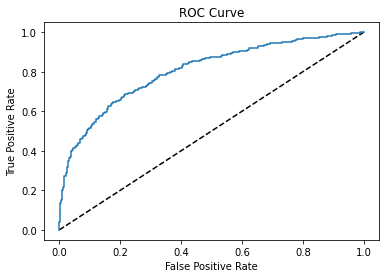

In [55]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The value of Logistic Regression AUC is higher in comparison to KNN

In [56]:
#Compute AUC score
roc_auc_score(y_test, y_pred_prob_logreg)

0.8050620142598409

### Decision Tree

Decision Tree accuracy on the testing set is 76%

In [57]:
tree_cv.score(X_test, y_test)

0.7646153846153846

The confusion matrix shows the number of prediction that are:

* True Positive(high quality actual and predicted) is 674
* True Negative(low quality actual and predicted) is 320
* False Positive(low quality actual and high quality predicted) is 157
* False Negative(high quality actual and low quality predicted) is 149

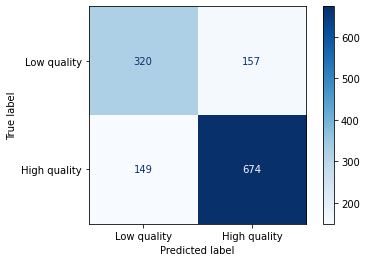

In [58]:
plot_confusion_matrix(tree_cv, X_test, y_test, display_labels=["Low quality", "High quality"], cmap=plt.cm.Blues)  

In [59]:
report = classification_report(y_test, y_predict_tree, output_dict=True)
classification_report_tree = pd.DataFrame(report).transpose()
classification_report_tree

,precision,recall,f1-score,support
0,0.682303,0.670860,0.676533,477.000000
1,0.811071,0.818955,0.814994,823.000000
accuracy,0.764615,0.764615,0.764615,0.764615
macro avg,0.746687,0.744907,0.745763,1300.000000
weighted avg,0.763823,0.764615,0.764189,1300.000000


In [60]:
y_pred_prob_tree = tree_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)

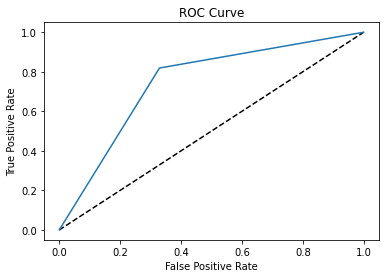

In [61]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The value of AUC is lower in comparison to Logistic Regression

In [62]:
roc_auc_score(y_test, y_pred_prob_tree)

0.7449072906557029

### Random Forest

Random Forest accuracy on the testing set is 84%, which shows the best result among other models.

In [63]:
randforest_cv.score(X_test, y_test)

0.84

The confusion matrix shows the number of prediction that are:

* True Positive(high quality actual and predicted) is 741
* True Negative(low quality actual and predicted) is 351
* False Positive(low quality actual and high quality predicted) is 82
* False Negative(high quality actual and low quality predicted) is 126

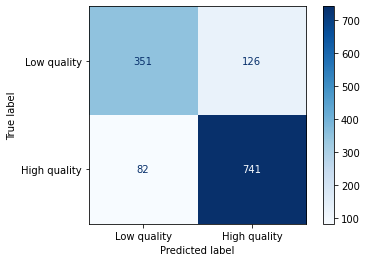

In [64]:
plot_confusion_matrix(randforest_cv, X_test, y_test, display_labels=["Low quality", "High quality"], cmap=plt.cm.Blues)  

In [65]:
report = classification_report(y_test, y_predict_forest, output_dict=True)
classification_report_forest = pd.DataFrame(report).transpose()
classification_report_forest 

,precision,recall,f1-score,support
0,0.810624,0.735849,0.771429,477.00
1,0.854671,0.900365,0.876923,823.00
accuracy,0.840000,0.840000,0.840000,0.84
macro avg,0.832647,0.818107,0.824176,1300.00
weighted avg,0.838509,0.840000,0.838215,1300.00


In [66]:
y_pred_prob_randforest = randforest_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_randforest)

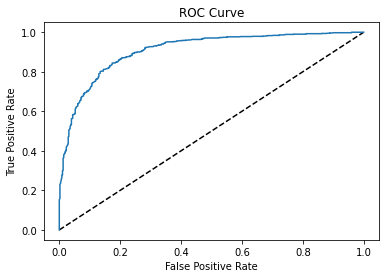

In [67]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The value of Random Forest AUC is the highest among all other models

In [68]:
roc_auc_score(y_test, y_pred_prob_randforest)

0.9083719887612688

Overall, it is clear that the Random Forest model works best and is most appropriate for our classification problem. Even though the target is imbalanced, a score of 84% is quite good.

## Feature Importance

Here we would like to define the input features that are the most useful at predicting a target variable.

Feature importance based on the Random Forest model:

In [69]:
# the data frame to show the importance of each feature based on random forest model
X_features = wine_df.drop(['IsHighQuality', 'quality', 'type'], axis=1)

<BarContainer object of 12 artists>

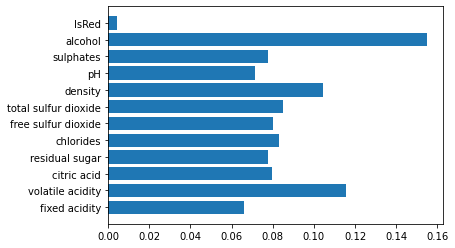

In [70]:
importances = randforest_cv.best_estimator_.feature_importances_
feature_importances = pd.Series(importances, index=X_features.columns)
plt.barh(X_features.columns, feature_importances)

It can be seen that alcohol, volatile acidity, and density are the 3 most important characteristics that affect the quality of a wine.

In [71]:
# The runtime is 2 minutes exactly on Intel® Core™ i5-7200U CPU @ 2.50GHz × 4
elapsed = time.time()-start

In [72]:
elapsed

134.79431343078613